In [1]:
"""
Probablistic Machine Learning - Task List 1
"""

%matplotlib inline
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Configuration
Generator = namedtuple('Generator', ['dist_func', 'dist_func_args'])
Config = namedtuple('Config',  ['nb_iter', 'frame_skip', 'generators', 'min_val', 'max_val'])

cfg = Config(nb_iter=1000,
             frame_skip=50,
             generators=[
                 Generator(dist_func=np.random.exponential,
                           dist_func_args=dict(scale=2)),
                 Generator(dist_func=np.random.uniform,
                           dist_func_args=dict(low=0, high=10)),
                 Generator(dist_func=np.random.normal,
                           dist_func_args=dict(loc=5, scale=2)),
             ],
             min_val=0,
             max_val=10
            )

In [3]:
# Random Number Generator
def make_infinite_random_number_generator(f, min_val, max_val, **f_args):
    def irnd():
        while True:
            # Generate
            num = int(f(**f_args))
            # Trim
            num = min(max_val, max(min_val, num))
            yield num
    return irnd()

In [4]:
class Exercise1(object):
    def __init__(self, config):
        self.config = config
        
    def _generate_numbers(self):
        generated_nums = []

        for gen in self.config.generators:
            rnd = make_infinite_random_number_generator(gen.dist_func,
                                                        self.config.min_val,
                                                        self.config.max_val,
                                                        **gen.dist_func_args)
            generated_nums.append([next(rnd) for _ in range(self.config.nb_iter)])
            
        return generated_nums
    
    def visualize(self):
        generated_nums = self._generate_numbers()        
        nb_generators = len(self.config.generators)
        frames = range(0, self.config.nb_iter, self.config.frame_skip)
        
        fig, plots = plt.subplots(1, nb_generators, sharex=True, sharey=True)
        fig.tight_layout()

        def animate(curr_step):            
            for idx, p in enumerate(plots):
                p.clear()
                p.hist(generated_nums[idx][:curr_step], rwidth=0.5)

        anim = animation.FuncAnimation(fig, animate, 
                                       frames=frames,
                                       interval=50)
        return anim

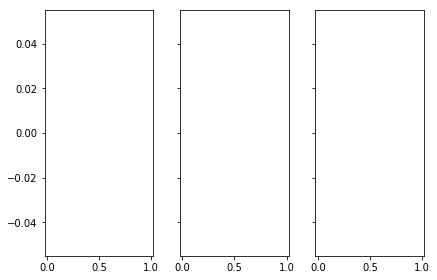

In [5]:
# Visualize exercise 1
e1 = Exercise1(cfg)
anim = e1.visualize()
HTML(anim.to_jshtml())

In [6]:
class Exercise2(object):
    def __init__(self, config):
        self.config = config
    
    def _generate_numbers(self):
        xs = []
        ys = []

        for gen in self.config.generators:
            rnd = make_infinite_random_number_generator(gen.dist_func,
                                                        self.config.min_val,
                                                        self.config.max_val,
                                                        **gen.dist_func_args)
            generated_pairs = np.array([
                [next(rnd), next(rnd)] for _ in range(self.config.nb_iter)
            ])
            xs.append(generated_pairs[:, 0])
            ys.append(generated_pairs[:, 1])
            
        return xs, ys
    
    def visualize(self):
        xs, ys = self._generate_numbers()
        nb_generators = len(self.config.generators)
        frames = range(0, self.config.nb_iter, self.config.frame_skip)
        
        fig, plots = plt.subplots(1, nb_generators, sharex=True, sharey=True)
        fig.tight_layout()

        def animate(curr_step):
            for idx, p in enumerate(plots):
                p.clear()
                heatmap, _, _ = np.histogram2d(xs[idx][:curr_step], 
                                               ys[idx][:curr_step])
                p.imshow(heatmap)

        anim = animation.FuncAnimation(fig, animate, 
                                       frames=frames, 
                                       interval=50)
        return anim

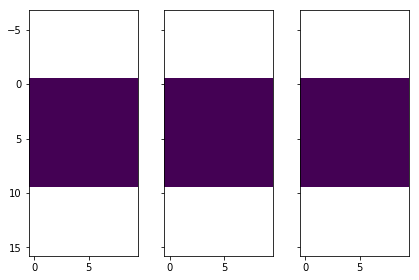

In [7]:
# Visualize exercise 2
e2 = Exercise2(cfg)
anim = e2.visualize()
HTML(anim.to_jshtml())

### Exercise 3
Let's assume that:
* $I$ - person is ill,
* $H$ - person is healty,
* $T$ - test was positive (true),
* $F$ - test was negative (false),

#### Given
* $P(I) \in [\frac{1}{50\;000}; \frac{100}{50\;000}]$
* $P(T \;|\; H) = 0.02$ (false positive)
* $P(F \;|\; I) = 0.01$ (false negative)

#### Task
Find $P(I \;|\; T) = \;?$


#### Solution
1. Using the Bayes rule:
    $$P(I\;|\;T) = \frac{P(T \;\cap\; I)}{P(T)} = \frac{P(T \;|\; I) \;*\; P(I)}{P(T)}$$ <br>
    We still need to know the values of: $P(T\;|\;I)$ and $P(T)$

2. **Lemma 1:** If $X \;\cap\; X' = \Omega$ and $Y \subseteq \Omega$, then $P(X \;|\; Y ) + P(X' \;|\; Y) = 1$
    
    **Proof**:
    
    Using the Bayes rule we get: 
    $$\frac{P(X \;\cap\; Y )}{P(Y)} + \frac{P(X' \;\cap\; Y )}{P(Y)} = 1$$<br>
    
    Using a Venn diagram:
    $$P(X' \;\cap\; Y ) = P(Y) - P(X \;\cap\; Y )$$<br>
    
    Therefore:
    $$\frac{P(X \;\cap\; Y ) + [P(Y) - P(X \;\cap\; Y )]}{P(Y)} = 1$$ <br>
    $$\frac{P(Y)}{P(Y)} = 1$$ <br>
    $$1 = 1$$ <br>

3. Using *Lemma 1*, and knowning that $T \;\cap\; F = \Omega$ we get:

    $$P(T\;|\;H) = 0.02 \to P(F\;|\;H) = 1 - P(T\;|\;H) = 0.98$$<br>
    $$P(F\;|\;I) = 0.01 \to \mathbf{P(T\;|\;I)} = 1 - P(F\;|\;I) = 0.99$$<br>
    
4. Using the total probability rule:
    $$ P(T) = P(T\;|\;H) * P(H) + P(T\;|\;I) * P(I)$$<br>
    
5. Knowning that: $H \;\cap\; I = \Omega$, we get:
    $$P(H) = 1 - P(I)$$<br>
    
6. Eventually we get:
    $$P(I\;|\;T) = \frac{P(T \;|\; I) \;*\; P(I)}{P(T)} = \frac{P(T \;|\; I) \;*\; P(I)}{P(T\;|\;H) * (1 - P(I)) + P(T\;|\;I) * P(I)}$$ <br>
    $$\mathbf{P(I\;|\;T) = \frac{0.99 * P(I)}{0.02 * (1 - P(I)) + 0.99 * P(I)}}$$<br>

Minimum val: 0.0009890406305883294
Maximum val: 0.09024612579762989


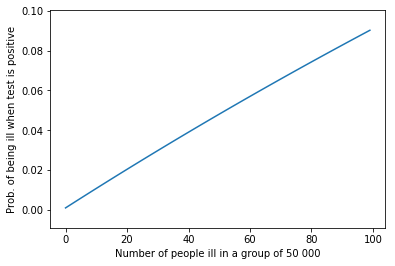

In [9]:
MIN_ILL_PEOPLE_IN_GROUP = 1
MAX_ILL_PEOPLE_IN_GROUP = 100
GROUP_SIZE = 50000

PROB_T_H = 0.02
PROB_F_I = 0.01

def exercise3():
    probs = []
    
    prob_T_I = 1 - PROB_F_I
    
    for x in range(MIN_ILL_PEOPLE_IN_GROUP, MAX_ILL_PEOPLE_IN_GROUP + 1):
        prob_I = x / GROUP_SIZE
        prob_I_T = (prob_T_I * prob_I) / (PROB_T_H * (1 - prob_I) + prob_T_I * prob_I)
        probs.append(prob_I_T)
        
    plt.xlabel('Number of people ill in a group of 50 000')
    plt.ylabel('Prob. of being ill when test is positive')
    plt.ylim((min(probs) - 0.01, max(probs) + 0.01))
    plt.plot(probs)
    
    print('Minimum val:', min(probs))
    print('Maximum val:', max(probs))
        
exercise3()